<a href="https://colab.research.google.com/github/Roy025/ML-Lab/blob/main/Class-Assignment/Logistic_Regression_Decision_Boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracyscore
from scipy.optimize import minimize as opt



In [ ]:
data = pd.read_csv('/content/data.txt', header = None)
data = np.array(data)


X = data[:, [0,1]]
y = data[:, [2]]

**Sigmoid Function**

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


**Intercept term**

In [ ]:
X = np.insert(X, 0, values=1, axis=1)
theta= np.zeros((X.shape[1], 1))

**Cost function and gradient**

In [62]:

test_theta = np.array([[-24], [0.2], [0.2]])

def CostFunction(theta, x, y):
    m = len(y)
    h_theta = g(x.dot(theta))
    J = (1.0 / m) * (((-y).transpose()).dot(np.log(h_theta)) - (1.0 - y.transpose()).dot(np.log(1.0 - h_theta)))
    J = np.float64(J)
    return J

def Gradient(theta, x, y):
    m = len(y)
    n = x.shape[1]
    theta = theta.reshape((n, 1))
    h_theta = g(x.dot(theta))
    grad = (1.0 / m) * (x.transpose().dot(h_theta - y))
    return grad.flatten()

Result = opt(fun=CostFunction, x0=np.zeros(X.shape[1]), args=(X, y), method='TNC', jac=Gradient)
theta = Result.x

print('Cost at theta:', Result.fun, '\n', 'Theta:', Result.x)

Cost at theta: 0.20349770158947478 
 Theta: [-25.16131857   0.20623159   0.20147149]


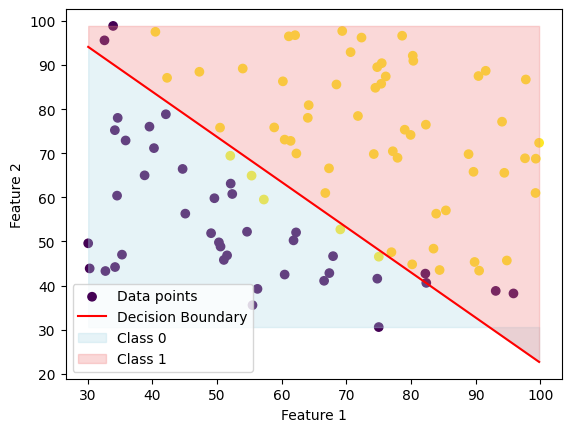

In [61]:
plt.scatter(X[:, 1], X[:, 2], c=y.flatten(), cmap='viridis', label='Data points')

# Plot the decision boundary
x1_values = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
x2_values = -(theta[0] + theta[1] * x1_values) / theta[2]

plt.plot(x1_values, x2_values, label='Decision Boundary', color='red')

# Fill the regions above and below the decision boundary with different colors
plt.fill_between(x1_values, np.min(X[:, 2]), x2_values, color='lightblue', alpha=0.3, label='Class 0')
plt.fill_between(x1_values, x2_values, np.max(X[:, 2]), color='lightcoral', alpha=0.3, label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
